# Opensky

providing open access of real-world air traffic control data to the public. The OpenSky Network consists of a multitude of sensors connected to the Internet by volunteers, industrial supporters, and academic/governmental organizations. All collected raw data is archived in a large historical database. 



In [ ]:
#Read data

import pandas as pd
import pickle

df = pd.read_pickle("traffic_eddf_day_bounded.pkl")

#print head and print columns of df

## columns description

### time

This column contains the unix (aka POSIX or epoch) timestamp for which the state vector was valid. You'll find one state vector per second for each aircraft which was active within the coverage of OpenSky at that particular second.  For example, the time is 1480760792 which means that we are looking at a state vector that was valid on Saturday, 03-Dec-16 10:26:32 UTC. Tip: There are online tools available for converting unix timestamps, just use Google.

### icao24

This column contains the 24-bit ICAO transponder ID which can be used to track specific airframes over different flights. This ID should never change during a registration period of an airframe, which doesn't change very often. So if you are looking for a particular aircraft, try to find out its 24-bit transponder ID and filter by this column. In our data, it's represented as a 6 digit hexadecimal number (string). In our case, we are looking at the state of an aircraft using the transponder ID a0d724. If you look it up on databases like airframes.org, you'll find out that this transponder ID is used by an Airbus A306 owned by UPS. You will find this column in all tables.

### lat/lon

These column contain the last known latitude and longitude of the aircraft. Coordinates are stored as decimal WGS84 coordinates. So here is what we know so far: On Saturday, 03-Dec-16 at 10:26:32 UTC, the UPS aircraft with transponder ID a0d724 was at position 37.89463883739407,-88.93331113068955. If you look it up on Google maps, it's somewhere in Illinois in the US.

### velocity

This column contains the speed over ground of the aircraft in meters per second. In our example, the UPS aircraft flew over Illinois at a speed of 190.8504039695975 meters per second.

### heading

This column represents the direction of movement (track angle) as the clockwise angle from the geographic north. Just a little side note for the aviation experts: you might want to complain that the term "heading" is not perfectly correct (if you are one of them you know what I mean) and something like "track" or "track angle" might be more correct. You are absolutely right and this might change in future releases, but for legacy reasons it's called "heading" for now. In our case, the aircraft flew into the direction 265.8263544365708° clockwise from geographic north, or in other words, to the west.

### vertrate

This column contains the vertical speed of the aircraft in meters per second. A negative number indicates that the aircraft was descending, a positive number indicates a ascend respectively. In the above example, the UPS aircraft was neither ascending nor descending.

### callsign

This column contains the callsign that was broadcast by the aircraft. Most airlines indicate the airline and the flight number in the callsign, but there is no unified system. In our example, the callsign indicates that this state vector belongs to UPS flight 858. By looking up the flightnumber on services like flightaware.com, you'll find out that this flight goes from Lousville to Phoenix every day.

### onground

This flag indicates whether the aircraft is broadcasting surface positions (true) or airborne positions (false). Our UPS aircraft was airborne.

### alert/spi

These two flags are special indicators used in ATC. If you need them, you'll know what they mean.

### squawk

This 4-digit octal number is another transponder code which is used by ATC and pilots for identification purposes and indication of emergencies. Usually, ATC assigns squawks to aircraft when they enter their airspace via radio. In the above example, the UPS flight was assigned squawk "7775". See e.g. Wikipedia [3] for a list of special purpose squawks.

### baroaltitude/geoaltitude

These two columns indicate the aircraft's altitudel. As the names suggest, baroaltitude is the altitude measured by the barometer and depends on factors such as weather, whereas geoaltitude is determined using the GNSS (GPS) sensor. In our case, the aircraft was flying at a geometric altitude (or height) of 9342.12 meters and a barometric altitude of 9144 meters. That makes a difference of almost 200 meters. You are likely to observe similar differences for aircraft in spatial and temporal vicinity. Note that due to its importance in aviation, barometric altitude will almost always be present, while the geometric altitude depends on the equipage of the aircraft.

### lastposupdate

This unix timestamp indicates the age of the position. The position of the state vector above was already 87.64 seconds old at the time when the state vector was created (time) and should not be used any longer.

### lastcontact

This unix timestamp indicates the time at which OpenSky received the last signal of the aircraft. As long as the aircraft is flying in an airspace which is well-covered by OpenSky's receivers this timestamp should never be older than 1-2 seconds compared to the state vectors timestamp (time). 

## Task 

1.Check number of flights in the data.

2.Check number of airframes

In [ ]:
#check number of flights in the data


#check number of airframes


In [ ]:
#select one flight, e.g. DLH1305
f = 
print(f)


In [ ]:
#lets plot all dataset

import matplotlib.pyplot as plt
import numpy as np

plt.scatter(x=, y= ,s=1)
plt.show()

In [ ]:
#lets plot now on a map
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

fig = px.scatter_map(f,
                        lat="latitude",
                        lon="longitude",
                        color="callsign",
                        # color_continuous_scale=color_scale,
                        # size="Listed",
                        zoom=10,
                        height=1000,
                        width=1000, center={'lat':50.032600,'lon': 8.534630})

fig.update_layout(mapbox_style="open-street-map")
fig.update_traces(opacity=.4)
# fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()



In [ ]:
#Plot only points on the ground
f_onground = 

fig = px.scatter_map(f_onground,
                        lat="latitude",
                        lon="longitude",
                        color="callsign",
                        # color_continuous_scale=color_scale,
                        # size="Listed",
                        zoom=14,
                        height=1000,
                        width=1000, center={'lat':50.032600,'lon': 8.534630})

fig.update_layout(mapbox_style="open-street-map")
fig.update_traces(opacity=.4)
# fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

Which runway does it land?

## Task 

Plot Altitude and Ground speed of flight f

In [ ]:
#plot Altitude and Ground speed of flight f
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.scatter(x=, y=,s=1,c='red')
ax2.scatter(x=, y=,s=1,c='green')
plt.show()

In [ ]:
#create a df where we keep only points when the flight lands (onground is False)
df = 

#now we create a histogram of flights, i.e. number of flights per hour 
df.groupby(df["timestamp"].dt.hour)['callsign'].count().plot(kind="bar")
plt.show()

In [ ]:
rwys = [
(50.032600, 8.534630, 69.636976,"07C"),
(50.045101, 8.586980,249.677101,"25C"),
(50.037102, 8.497080, 69.752766,"07L"),
(50.045799, 8.533720,249.780851,"25R"),
(50.027500, 8.534170, 69.494349,"07R"),
(50.040100, 8.586530,249.534478,"25L"),
(50.034154, 8.525944,179.634417, "18"),
(49.998493, 8.526297,359.634688, "36")
]



Runway 07C

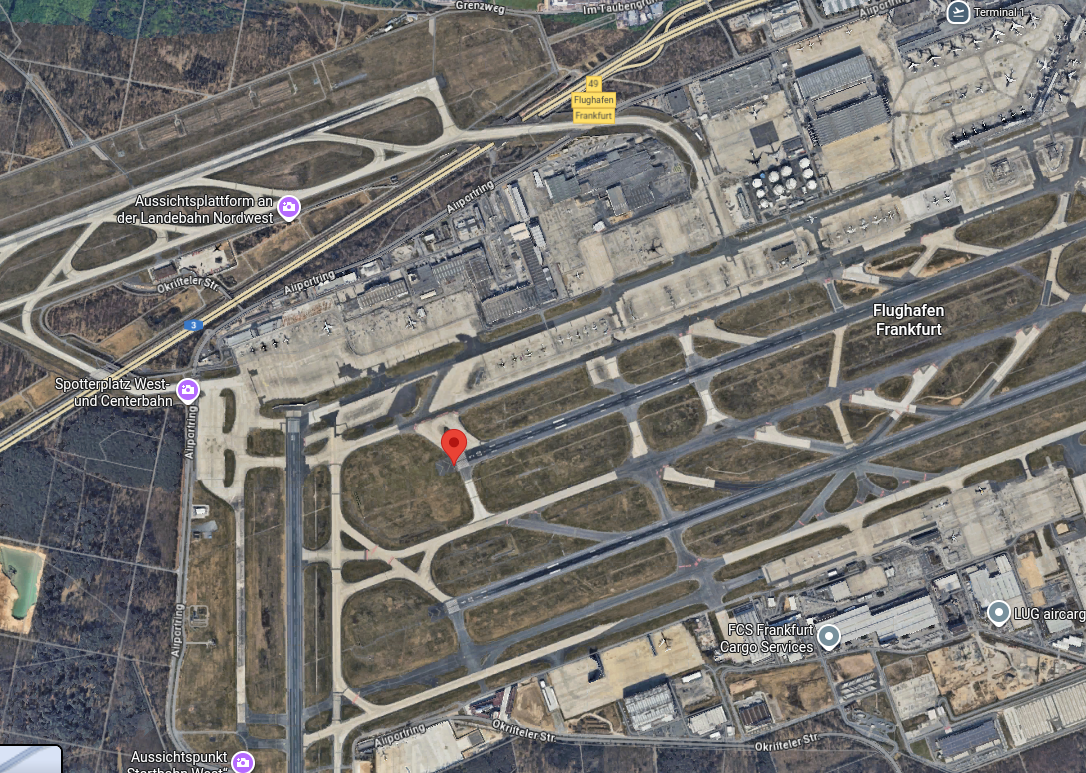

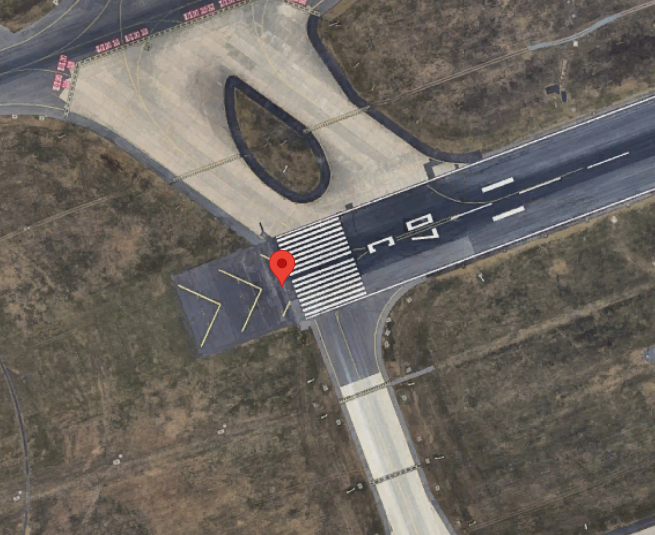

In [ ]:
from math import radians, cos, sin, asin, sqrt


def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles
    return c * r

In [ ]:
f_last = f[f['onground']==False].drop_duplicates(subset='callsign',keep='last')
print(f_last)

#distance to 07C
dist = haversine(rwys[0][1],rwys[0][0],f_last['longitude'].iloc[0],f_last['latitude'].iloc[0])
print(dist)

#distance to 07L
dist = 
print(dist)

#distance to 25R
dist = 
print(dist)

In [ ]:
rwys2 = [
((50.032600, 8.534630, 69.636976,"07C"),
(50.045101, 8.586980,249.677101,"25C")),
((50.037102, 8.497080, 69.752766,"07L"),
(50.045799, 8.533720,249.780851,"25R")),
((50.027500, 8.534170, 69.494349,"07R"),
(50.040100, 8.586530,249.534478,"25L")),
((50.034154, 8.525944,179.634417, "18"),
(49.998493, 8.526297,359.634688, "36"))
]

def distance_to_rwy(rwy,row):
    dist0 = haversine(rwy[0][1],rwy[0][0],row['longitude'],row['latitude'])
    dist1 = haversine(rwy[1][1],rwy[1][0],row['longitude'],row['latitude'])
    heading_dif0 = abs(rwy[0][2]-row['track'])
    
    return dist0

    

f_last['rwy07L']= f_last.apply(lambda row: distance_to_rwy(rwys2[1],row),1)
print(f_last)

## Task
modify the above function to check for minimum distance and then check the heading. If the minimum distance rwy has large heading diffference, return the other rwy.

In [ ]:
aircraft_db = pd.read_csv('aircraft-database-complete-2021-12.csv', encoding='latin1', low_memory=False).rename(columns={'Unnamed: 0':'icao24','Unnamed: 5':'ac_family'})

#merge aircraft_db and f_last to add 'ac_family' to f_last
f_last = 
print(f_last[['callsign','ac_family']])

## Task
Add types for all aircraft in the database. Do a histogram of AC types.

## Task

How could we detect a holding in arrival flight? A typical holding looks like this:

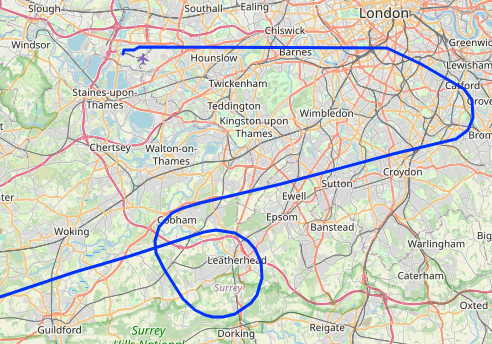

## further datasets

Flight list (2019-2022)  https://zenodo.org/records/7923702

full 24 set of ADS-B: https://opensky-network.org/datasets/#states/